In [10]:
from data.data_collector import DataCollector

In [11]:
dc_sb = DataCollector('spambase')
dc_bw = DataCollector('breastw')


In [12]:
from evaluation.linear_translator import translate_kfold
import torch
import numpy as np

In [13]:
index_list = dc_bw.find_lime_zero_explanations()
non_index_list = [i for i in range(0, 1000) if i not in index_list]


In [14]:
from evaluation.numerical_evaluation import calculate_variance

In [15]:
print(calculate_variance(dc_bw.scaled_explanations, False, True))

{0: tensor([0.8843, 0.1680, 0.4737, 0.0551, 0.1356, 0.3657, 0.1584, 0.1224, 0.2247]), 1: tensor([0.3612, 0.1104, 0.1815, 0.0858, 0.1126, 0.1995, 0.1382, 0.1313, 0.1291]), 2: tensor([0.2503, 0.0159, 0.1737, 0.0049, 0.0281, 0.1721, 0.0648, 0.0287, 0.0475]), 3: tensor([0.5303, 0.0927, 0.1992, 0.0502, 0.0703, 0.2421, 0.1437, 0.0796, 0.1363]), 4: tensor([0.6151, 0.1277, 0.4458, 0.0636, 0.1123, 0.4575, 0.1550, 0.1387, 0.2985])}


In [16]:
meta_y = dc_bw.collect_meta_data()
meta_y = meta_y['Y']
print(np.count_nonzero(meta_y[non_index_list]))
print(len(meta_y[non_index_list])-np.count_nonzero(meta_y[non_index_list]))

index_list_sb = dc_sb.find_lime_zero_explanations()
non_index_list_sb = [i for i in range(0, 921) if i not in index_list_sb]
meta_y_sb = dc_sb.collect_meta_data()['Y']
print(meta_y_sb[index_list_sb])
print(len(index_list_sb))
dc_btsc = DataCollector('btsc')
print(np.count_nonzero(meta_y_sb))
print(len(meta_y_sb))
print(np.count_nonzero(meta_y_sb[non_index_list_sb]))

index_list_btsc = dc_btsc.find_lime_zero_explanations()
non_index_list_btsc = [i for i in range(0, 150) if i not in index_list_btsc]
meta_y_btsc = dc_btsc.collect_meta_data()['Y']
print(len(index_list_btsc))
print(np.count_nonzero(meta_y_btsc))

print(meta_y_btsc[index_list_btsc])


325
281
tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
155
367
921
350
8
45
tensor([0, 0, 0, 0, 0, 0, 1, 0])


In [17]:
from evaluation.linear_translator import compare_to_mean_baseline


In [20]:
# print(compare_to_mean_baseline(dc_sb.scaled_explanations[0:921, :-1].numpy()))
# print(compare_to_mean_baseline(dc_bw.scaled_explanations[0:1000, :-1].numpy()))
# print(compare_to_mean_baseline(dc_sb.scaled_explanations[4000:5000, :-1].numpy()))

In [ ]:
targets = torch.ones((921, 57))
print(translate_kfold(dc_sb.explanations_all[0:921, :-1], targets))

In [ ]:
dc_bw.create_non_zero_dataset()

In [25]:
from evaluation.linear_translator import translate, translate_pairwise
import numpy as np
# from sklearn.metrics import mean_squared_error

In [26]:
print(dc_bw.scaled_explanations[1000:1010])

tensor([[-0.9913,  0.3290,  1.0000,  0.1738,  0.3240,  0.8282,  0.4158,  0.5662,
          0.4311,  1.0000],
        [-0.0691,  0.0459,  0.8960,  0.7894,  0.4129,  1.0000,  0.1451,  0.5579,
          0.5932,  1.0000],
        [ 1.0000,  0.5001,  0.6981,  0.0531,  0.4344,  0.5960, -0.1985,  0.6291,
          0.2767,  1.0000],
        [ 1.0000,  0.2144,  0.9518,  0.5301,  0.6310,  0.3251, -0.0828,  0.5595,
          0.3499,  1.0000],
        [ 1.0000,  0.4264,  0.6632,  0.6110,  0.3342,  0.7061,  0.4553,  0.4479,
          0.0082,  1.0000],
        [ 0.4056,  0.2020,  0.9419, -0.0160, -0.1590,  0.8849,  0.6056,  0.0131,
          1.0000,  1.0000],
        [-0.7657,  0.6996,  0.4760,  0.2533,  0.1776,  1.0000,  0.5042,  0.9387,
          0.3196,  1.0000],
        [ 1.0000, -0.2734, -0.1280,  0.1189,  0.2916,  0.7597, -0.2036, -0.7459,
          0.3299,  1.0000],
        [ 1.0000,  0.1977,  0.3137,  0.7368,  0.4204,  0.3537,  0.4413, -0.1894,
          0.2450,  1.0000],
        [ 0.9726,  

In [27]:
r2_scaled, mse_scaled, mse_baseline = translate_pairwise(dc_bw.scaled_explanations, dc_bw.non_zero_explanations)
dc_bw.mask_features(3, 0, True)
r2_masked3, mse_masked3, mse_baseline3 = translate_pairwise(dc_bw.masked_explanations, dc_bw.non_zero_masked_explanations)
dc_bw.mask_features(6, 0, True)
r2_masked6, mse_masked6, mse_baseline6 = translate_pairwise(dc_bw.masked_explanations, dc_bw.non_zero_masked_explanations)

In [28]:
print(mse_baseline)

{'IG_KS': 0.16090758439089353, 'IG_LI': 0.12301894866617435, 'IG_SG': 0.17143058565024719, 'IG_VG': 0.2679787159550666, 'KS_IG': 0.28726474486753323, 'KS_LI': 0.12301894866617435, 'KS_SG': 0.17143058565024719, 'KS_VG': 0.2679787159550666, 'LI_IG': 0.31821687180476693, 'LI_KS': 0.1886849920874391, 'LI_SG': 0.09359380133425765, 'LI_VG': 0.3006424572558088, 'SG_IG': 0.28726474486753323, 'SG_KS': 0.16090758439089353, 'SG_LI': 0.12301894866617435, 'SG_VG': 0.2679787159550666, 'VG_IG': 0.28726474486753323, 'VG_KS': 0.16090758439089353, 'VG_LI': 0.12301894866617435, 'VG_SG': 0.17143058565024719}


In [29]:
from visualization.translator_fig import visualize_translation_scores, visualize_multiple_scores

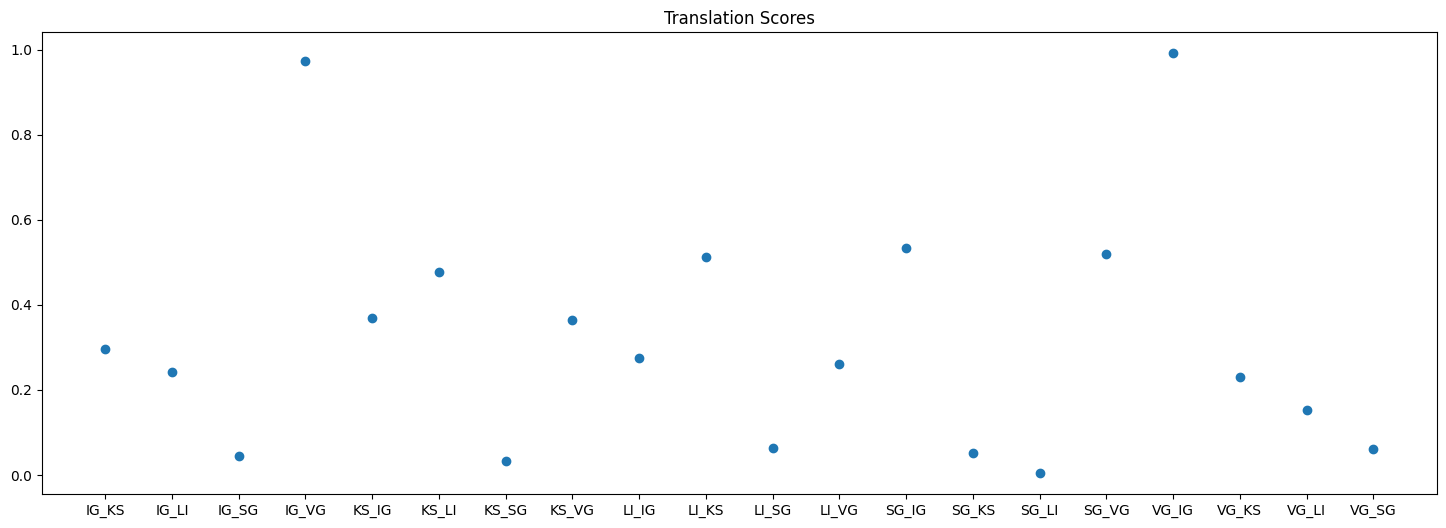

In [30]:
visualize_translation_scores(r2_scaled)

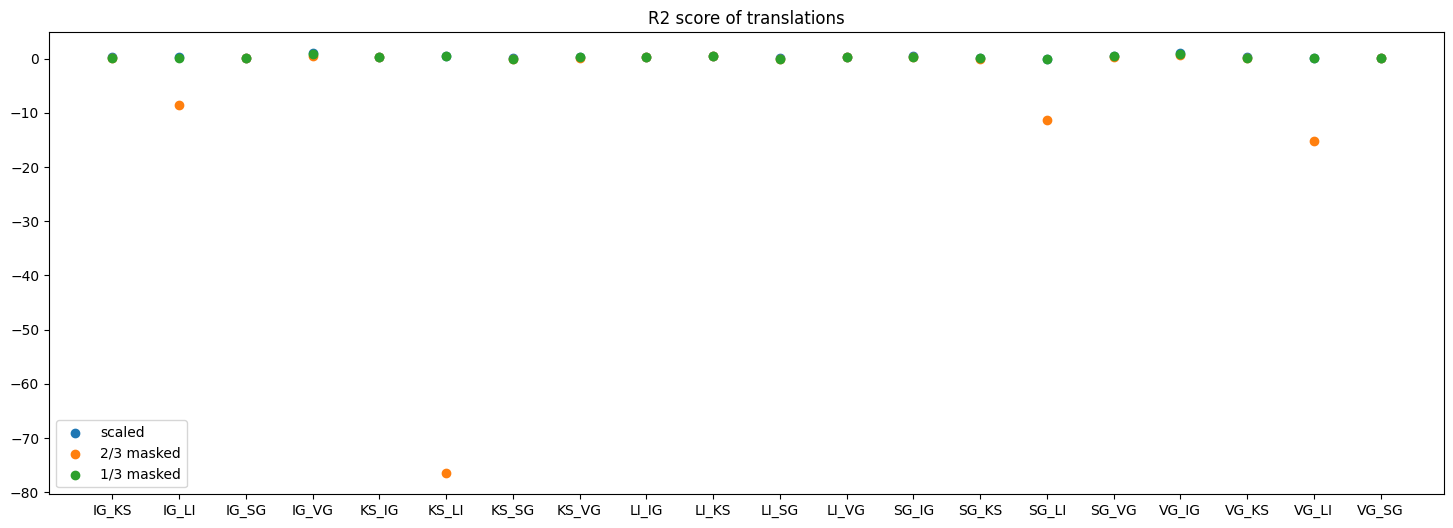

In [31]:
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')

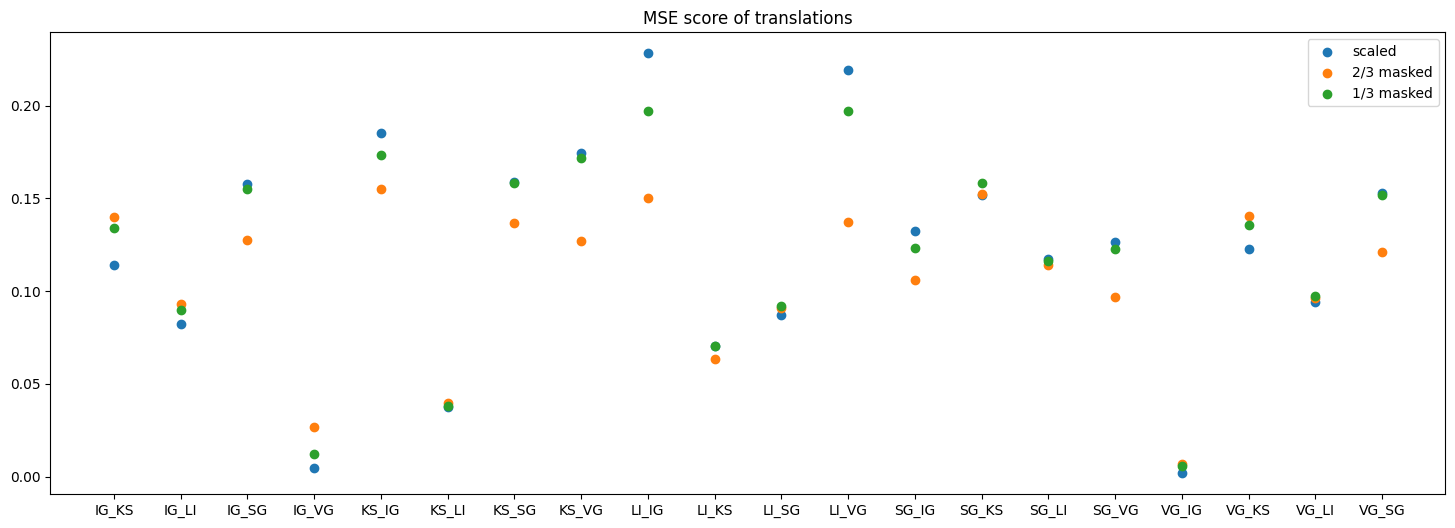

In [32]:
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations')

In [13]:
r2_scaled, mse_scaled, mse_baseline = translate_pairwise(dc_sb.scaled_explanations, dc_sb.non_zero_explanations)
dc_sb.mask_features(19, 0, True)
r2_masked3, mse_masked3, mse_baseline3 = translate_pairwise(dc_sb.masked_explanations, dc_sb.non_zero_masked_explanations)
dc_sb.mask_features(38, 0, True)
r2_masked6, mse_masked6, mse_baseline6 = translate_pairwise(dc_sb.masked_explanations, dc_sb.non_zero_masked_explanations)

In [7]:
visualize_translation_scores(r2_scaled)
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

NameError: name 'visualize_translation_scores' is not defined

In [15]:
dc_spf = DataCollector('spf')
dc_spf.create_non_zero_dataset()

tensor([[-4.5482e-01, -6.1059e-02, -5.7879e-02,  ...,  7.2226e-02,
         -2.7875e-01,  0.0000e+00],
        [-2.5703e-01,  1.1847e-01, -2.6198e-01,  ...,  8.0506e-01,
          1.2969e-01,  0.0000e+00],
        [ 7.2509e-02, -6.8391e-02, -5.1678e-01,  ...,  4.7175e-02,
         -2.9617e-02,  0.0000e+00],
        ...,
        [-4.7016e-01, -9.7888e-01,  2.8577e-01,  ..., -5.0615e-01,
         -3.2090e-01,  4.0000e+00],
        [-4.2756e-01, -8.8650e-01,  1.1033e-01,  ..., -1.9538e-01,
          7.0556e-02,  4.0000e+00],
        [-3.1797e-03,  3.9915e-01,  1.2019e-01,  ...,  3.6589e-01,
          3.4891e-01,  4.0000e+00]])

In [16]:
r2_scaled, mse_scaled, mse_baseline = translate_pairwise(dc_spf.scaled_explanations, dc_spf.non_zero_explanations)
dc_spf.mask_features(8, 0, True)
r2_masked3, mse_masked3, mse_baseline3 = translate_pairwise(dc_spf.masked_explanations, dc_spf.non_zero_masked_explanations)
dc_spf.mask_features(16, 0, True)
r2_masked6, mse_masked6, mse_baseline6 = translate_pairwise(dc_spf.masked_explanations, dc_spf.non_zero_masked_explanations)

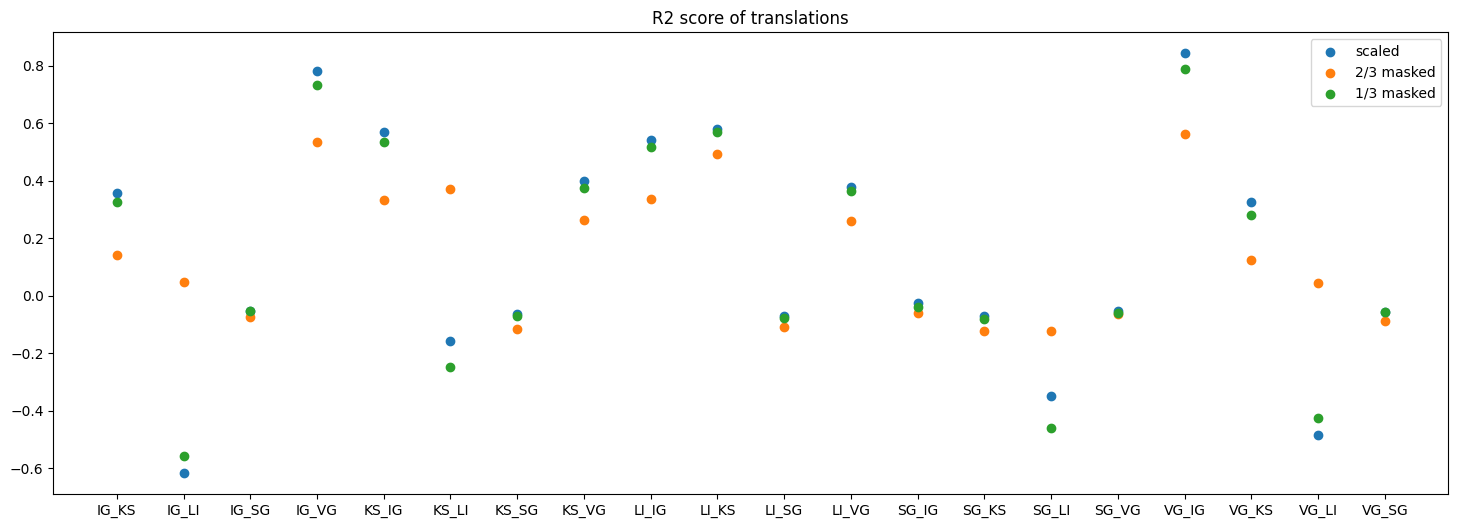

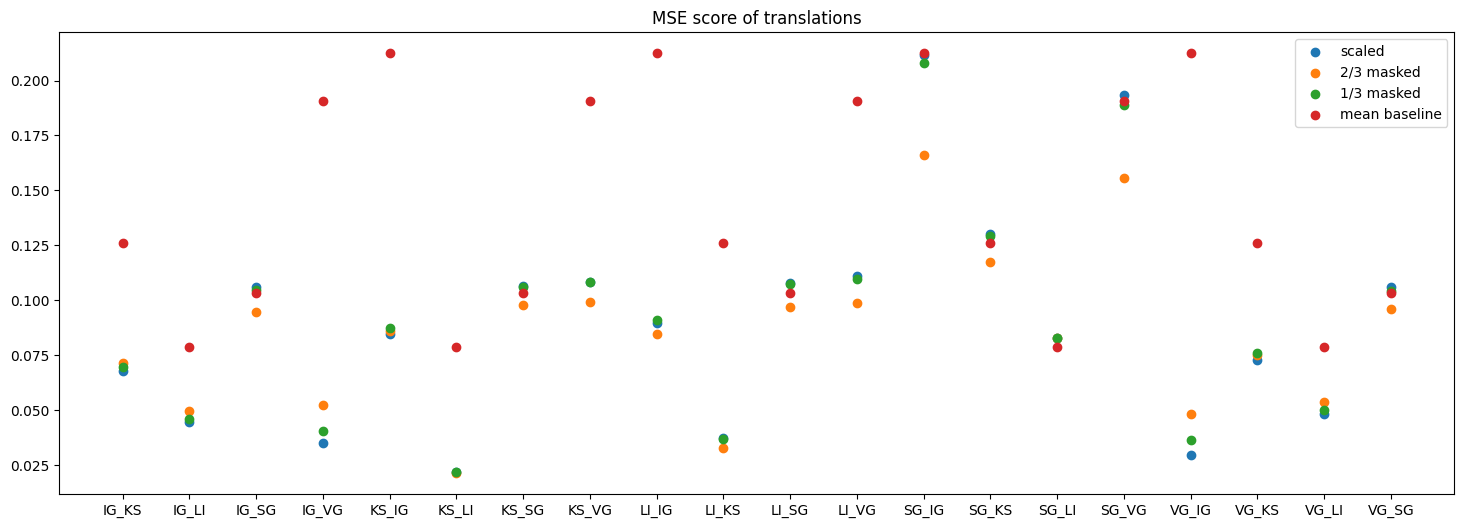

In [17]:
visualize_multiple_scores(r2_scaled, r2_masked3, r2_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'R2 score of translations')
visualize_multiple_scores(mse_scaled, mse_masked3, mse_masked6, ('scaled', '2/3 masked', '1/3 masked'), 'MSE score of translations', mse_baseline)

In [ ]:
from evaluation.numerical_evaluation import count_features_per_method, count_feature_amount, count_lime_features


In [ ]:
print(dc_bw.explanation_set['breastw_273117_11880_EPOCH-BATCH_li.pkl'][3])

In [ ]:
dc_bw.mask_features(4, 0, True)
print(count_lime_features(dc_sb.scaled_explanations[1842:2763]))

# print(count_features_per_method(dc_bw.scaled_explanations, True))
# print(count_features_per_method(dc_bw.masked_explanations, True))
# print(count_feature_amount(dc_bw.scaled_explanations[2000:3000], True))

print(count_lime_features(dc_bw.non_zero_explanations[1212:1818]))

In [ ]:
dc_spf = DataCollector('spf')
print(len(dc_spf.scaled_explanations))
print(count_lime_features(dc_spf.scaled_explanations[778:1167]))

In [ ]:
dc_btsc = DataCollector('btsc')
print(len(dc_btsc.scaled_explanations))
print(count_lime_features(dc_btsc.scaled_explanations[300:450]))

In [ ]:
import torch 


In [ ]:
dc_btsc = DataCollector('btsc')
# print(btsc['btsc_300804_11880_EPOCH-BATCH_li.pkl'])

In [ ]:
from data.preprocessing import scale_data
from data.evaluation_prep import prepare_umap_data
from evaluation.umap import visualize_umap, project_umap
import torch

In [ ]:
spambase = dc.collect_data('spambase')
keys = dc.get_keys(spambase, 1)
umap_sb = prepare_umap_data(spambase, keys, scale=True)
embedding = project_umap(umap_sb, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_sb, embedding)

In [ ]:
umap_sb = prepare_umap_data(spambase, keys, scale=False)
embedding = project_umap(umap_sb, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_sb, embedding)

In [ ]:
breastw = dc.collect_data('breastw')
keys = dc.get_keys(breastw, 1)
umap_bw = prepare_umap_data(breastw, keys, scale=True)
embedding = project_umap(umap_bw, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_bw, embedding)

In [ ]:
umap_bw = prepare_umap_data(breastw, keys, scale=False)
embedding = project_umap(umap_bw, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_bw, embedding)

In [ ]:
spf = dc.collect_data('spf')
keys = dc.get_keys(spf, 1)
umap_spf = prepare_umap_data(spf, keys, scale=True)
embedding = project_umap(umap_spf, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_spf, embedding)

In [ ]:
umap_spf = prepare_umap_data(spf, keys, scale=False)
embedding = project_umap(umap_spf, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_spf, embedding)

In [ ]:
btsc = dc.collect_data('btsc')
keys = dc.get_keys(btsc, 1)
umap_btsc = prepare_umap_data(btsc, keys, scale=True)
embedding = project_umap(umap_btsc, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_btsc, embedding)
print(btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:19])

In [ ]:
umap_btsc = prepare_umap_data(btsc, keys, scale=False)
embedding = project_umap(umap_btsc, n_neighbors=15, min_dist=0.5)
visualize_umap(umap_btsc, embedding)

In [ ]:
# btsc10 = btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10]
# print(btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10])
# btsc10_scaled = btsc10.clone()
# btsc10_scaled[:,-1] = torch.tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
# print(btsc10_scaled)
# # print(btsc10)
# btsc10_scaled[:, :-1] = scale_data(btsc10_scaled[:, :-1])
# print(btsc10_scaled)


In [ ]:
from data.preprocessing import mask_features


In [ ]:
btsc_test = btsc['btsc_300804_11880_EPOCH-BATCH_ks.pkl'][0:10]
btsc_test_scaled = scale_data(btsc_test)
# print(btsc_test_scaled)
# print(mask_features(btsc_test_scaled, 0, 2))
